In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# %matplotlib widget
# %matplotlib notebook
import matplotlib as mpl

import scipy.signal as signal
import scipy.ndimage as ndimage
import numba
from numba import jit, njit

import copy
from importlib import reload
import matplotlib.animation as animation
from IPython.display import HTML

import skimage.transform as sktransform 
from skimage import color, morphology

plt.rcParams["animation.html"] = "jshtml"

import pickle


import popdyn.flow as flow

# prepare canvases

In [2]:
land = pickle.load(open("land.p", "rb"))

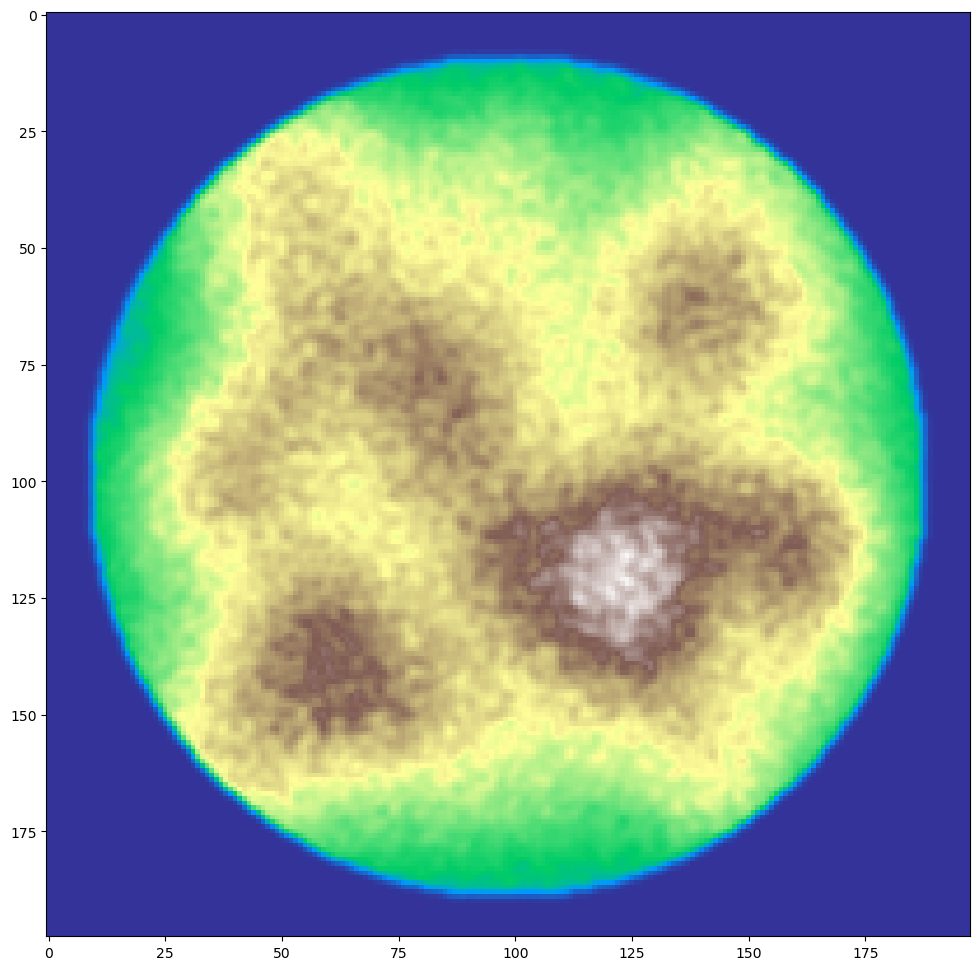

In [3]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)
plt.imshow(land, cmap=plt.cm.terrain, vmin=10, vmax=4000)

In [42]:
lmap = land  # meters in height of rock
wmap = np.zeros(shape=lmap.shape) + 500 # meters of water
gmap = np.zeros(shape=lmap.shape) # meters in height of gravel and sand
imap = np.zeros(shape=lmap.shape) # meters in height of ice glaciers
tmap = np.zeros(shape=lmap.shape) + 20. # degrees Celsius

initial_world = np.dstack((lmap * 0.8, gmap * 0.2, wmap, imap, tmap)).T
layers = ("rock", "gravel", "water", "ice", "temperature")

In [78]:
reload(flow)

<module 'popdyn.flow' from '/home/vtn/PROJECTS/popdyn-live/popdyn/flow.py'>

In [79]:
cs = flow.CellSpace(initial_world, layers, ())

In [80]:
cs.padded_canvas.shape

(5, 200, 200)

In [6]:
class FlowRule(object):
    def __init__(self, flow_factor=0.5):
        """
        Must return the residual canvas in evolve() !!!!!
        """
        self.flow_factor = flow_factor
          
    def evolve(self, cell):
      
        canvas = cell.canvas
        height = np.sum(canvas[:])
        
        
        pass

    def _calc_flows(self, vmap, outflow, cell):
        shifted_slide = [] 
        for i, ii in enumerate(cell.imap_unshifted):
            # the padding here is what restricts the landslide to the frozen boundary condition
            tmp = np.pad(outflow[i], pad_width=1, mode="constant", constant_values=0)
            tmp = tmp.flat[ii]
            shifted_slide.append(tmp)
        shifted_slide = np.array(shifted_landslide)
        return shifted_slide.sum(axis=0)
    
    def calc_flows(self, vmap, outflow, cell):
        vmap -= outflow.sum(axis=0)
        vmap += self._calc_flows(vmap, outflow, cell)
        return vmap
 

In [7]:
rule = FlowRule()

In [9]:
%prun cs.flow()

0 out of 99
1 out of 99
2 out of 99
3 out of 99
4 out of 99
5 out of 99
6 out of 99
7 out of 99
8 out of 99
9 out of 99
10 out of 99
11 out of 99
12 out of 99
13 out of 99
14 out of 99
15 out of 99
16 out of 99
17 out of 99
18 out of 99
19 out of 99
20 out of 99
21 out of 99
22 out of 99
23 out of 99
24 out of 99
25 out of 99
26 out of 99
27 out of 99
28 out of 99
29 out of 99
30 out of 99
31 out of 99
32 out of 99
33 out of 99
34 out of 99
35 out of 99
36 out of 99
37 out of 99
38 out of 99
39 out of 99
40 out of 99
41 out of 99
42 out of 99
43 out of 99
44 out of 99
45 out of 99
46 out of 99
47 out of 99
48 out of 99
49 out of 99
50 out of 99
51 out of 99
52 out of 99
53 out of 99
54 out of 99
55 out of 99
56 out of 99
57 out of 99
58 out of 99
59 out of 99
60 out of 99
61 out of 99
62 out of 99
63 out of 99
64 out of 99
65 out of 99
66 out of 99
67 out of 99
68 out of 99
69 out of 99
70 out of 99
71 out of 99
72 out of 99
73 out of 99
74 out of 99
75 out of 99
76 out of 99
77 out of

In [34]:
cs.canvas.shape #[cs.imap_shifted[0]]

(198, 198, 5)